In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dython.nominal import associations

# EDA - Análise Exploratória de Dados

In [2]:
data = pd.read_csv('Case Rkg Empregabilidade.csv')

In [3]:
data.shape

(951702, 13)

In [4]:
data.columns

Index(['COD_UNIDADE', 'DESC_CURSO', 'COD_MATRIZ', 'TURNO', 'N_SEMESTRES',
       'SEMESTRE_ATUAL', 'Código disciplina', 'SEMESTRE_OFERTA', 'ANO_ENTRADA',
       'SEMESTRE_ENTRADA', 'SEMESTRE_FORMATURA', 'QTD_ALUNOS',
       'DESEMPENHO_TURMA_PROVA'],
      dtype='object')

In [5]:
data.dtypes

COD_UNIDADE                object
DESC_CURSO                 object
COD_MATRIZ                 object
TURNO                      object
N_SEMESTRES                 int64
SEMESTRE_ATUAL            float64
Código disciplina          object
SEMESTRE_OFERTA             int64
ANO_ENTRADA                 int64
SEMESTRE_ENTRADA            int64
SEMESTRE_FORMATURA         object
QTD_ALUNOS                  int64
DESEMPENHO_TURMA_PROVA      int64
dtype: object

In [6]:
data.head()

,COD_UNIDADE,DESC_CURSO,COD_MATRIZ,TURNO,N_SEMESTRES,SEMESTRE_ATUAL,Código disciplina,SEMESTRE_OFERTA,ANO_ENTRADA,SEMESTRE_ENTRADA,SEMESTRE_FORMATURA,QTD_ALUNOS,DESEMPENHO_TURMA_PROVA
0,CIL,Administração,ADCS1401,NOT,8,7.0,ATIC001,1,2014,1,2017_2,18,4
1,CIL,Administração,ADCS1401,NOT,8,7.0,CSA1177,1,2014,1,2017_2,18,4
2,CIL,Administração,ADCS1401,NOT,8,7.0,CSA1230,1,2014,1,2017_2,18,4
3,CIL,Administração,ADCS1401,NOT,8,7.0,CSA1254,1,2014,1,2017_2,18,4
4,CIL,Administração,ADCS1401,NOT,8,7.0,CSA1255,1,2014,1,2017_2,18,4


In [7]:
data.nunique(
    axis=0
)  # Quantos valores únicos para cada variável, observando a consistência da base

COD_UNIDADE                 78
DESC_CURSO                  94
COD_MATRIZ                 901
TURNO                        4
N_SEMESTRES                  8
SEMESTRE_ATUAL               9
Código disciplina         5631
SEMESTRE_OFERTA             11
ANO_ENTRADA                 10
SEMESTRE_ENTRADA             2
SEMESTRE_FORMATURA          10
QTD_ALUNOS                  71
DESEMPENHO_TURMA_PROVA       5
dtype: int64

In [8]:
data.isna().sum()  # Verificando os dados ausentes

COD_UNIDADE                  0
DESC_CURSO                   0
COD_MATRIZ                   0
TURNO                        0
N_SEMESTRES                  0
SEMESTRE_ATUAL            1606
Código disciplina            0
SEMESTRE_OFERTA              0
ANO_ENTRADA                  0
SEMESTRE_ENTRADA             0
SEMESTRE_FORMATURA           0
QTD_ALUNOS                   0
DESEMPENHO_TURMA_PROVA       0
dtype: int64

In [9]:
data.dropna(axis=0, inplace=True)  # Excluindo as observações com dados nulos

data['SEMESTRE_ATUAL'] = data['SEMESTRE_ATUAL'].astype(
    int)  # Transformando para inteiros para ter uma melhor coesão

data['ANO_ENTRADA'] = data['ANO_ENTRADA'].astype(
    str) + "_" + data['SEMESTRE_ENTRADA'].astype(
        str)  # Aplicando o padrão do 'SEMESTRE_FORMATURA'

data.drop(columns='SEMESTRE_ENTRADA',
          inplace=True)  # Não precisamos mais o semestre de entrada


def norm_courses(row):
    '''
    Normalizes the name of some courses that are out of line 
    '''
    if row['DESC_CURSO'] == 'Arquitetura e Urbanismo - Bacharelado':
        return 'Arquitetura e Urbanismo'
    if row['DESC_CURSO'] == 'Engenharia Civil - Bacharelado':
        return 'Engenharia Civil'
    if row['DESC_CURSO'] == 'Engenharia da Computação - Bacharelado':
        return 'Engenharia da Computação'
    if row['DESC_CURSO'] == 'Engenharia Elétrica - Bacharelado':
        return 'Engenharia Elétrica'
    if row['DESC_CURSO'] == 'Jornalismo':
        return 'Comunicação Social - Habilitação em Jornalismo'
    return row['DESC_CURSO']


data['DESC_CURSO'] = data.apply(lambda row: norm_courses(row), axis=1)

In [10]:
data.describe().T  # Sumário estatístico das variáveis numéricas

,count,mean,std,min,25%,50%,75%,max
N_SEMESTRES,950096.0,8.892196,1.648947,4.0,8.0,10.0,10.0,11.0
SEMESTRE_ATUAL,950096.0,3.389268,2.535323,1.0,1.0,3.0,5.0,9.0
SEMESTRE_OFERTA,950096.0,5.006846,2.752410,1.0,3.0,5.0,7.0,11.0
QTD_ALUNOS,950096.0,44.712461,20.485835,10.0,27.0,45.0,62.0,80.0
DESEMPENHO_TURMA_PROVA,950096.0,3.004962,1.412574,1.0,2.0,3.0,4.0,5.0


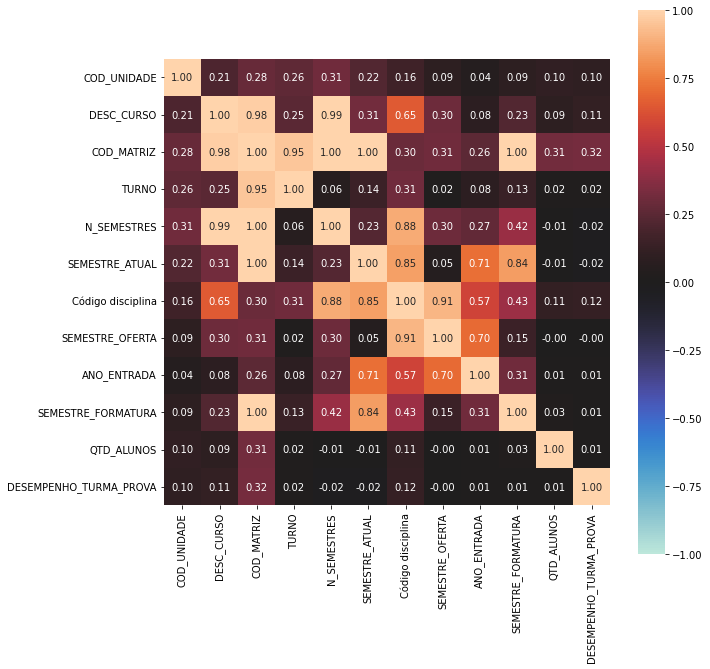

In [11]:
# Matriz de correlação que inclui variáveis categóricas
complete_correlation = associations(data,
                                    filename='complete_correlation.png',
                                    figsize=(10, 10))

# Apresentação dos Dados e Formulação do Problema

## ❓ A Dúvida:

* A empresa decidiu participar de um novo ranking nacional que medirá quais instituições de ensino melhor preparam seus alunos para o mercado de trabalho.
* É necessário a criação de uma métrica para acompanhar e comparar o desempenho dos alunos participantes e para isso foi realizado um simulado.
* O principal objetivo é avaliar o desempenho e melhora-lo com o investimento de 1MM/semestre.

## 🎲 A Base de Dados:

Para essa missão foi fornecida uma base de dados da matriz curricular da empresa, na qual temos:
1. O resultado (a nota) do simulado por turma, totalizando um pouco mais de 950 mil observações;
2. Mais doze informações como a unidade, curso, e disciplina pertencente a turma em questão;

In [12]:
data.head(3)

,COD_UNIDADE,DESC_CURSO,COD_MATRIZ,TURNO,N_SEMESTRES,SEMESTRE_ATUAL,Código disciplina,SEMESTRE_OFERTA,ANO_ENTRADA,SEMESTRE_FORMATURA,QTD_ALUNOS,DESEMPENHO_TURMA_PROVA
0,CIL,Administração,ADCS1401,NOT,8,7,ATIC001,1,2014_1,2017_2,18,4
1,CIL,Administração,ADCS1401,NOT,8,7,CSA1177,1,2014_1,2017_2,18,4
2,CIL,Administração,ADCS1401,NOT,8,7,CSA1230,1,2014_1,2017_2,18,4


# 📊 Visualizando os dados

## Distribuição de algumas variáveis

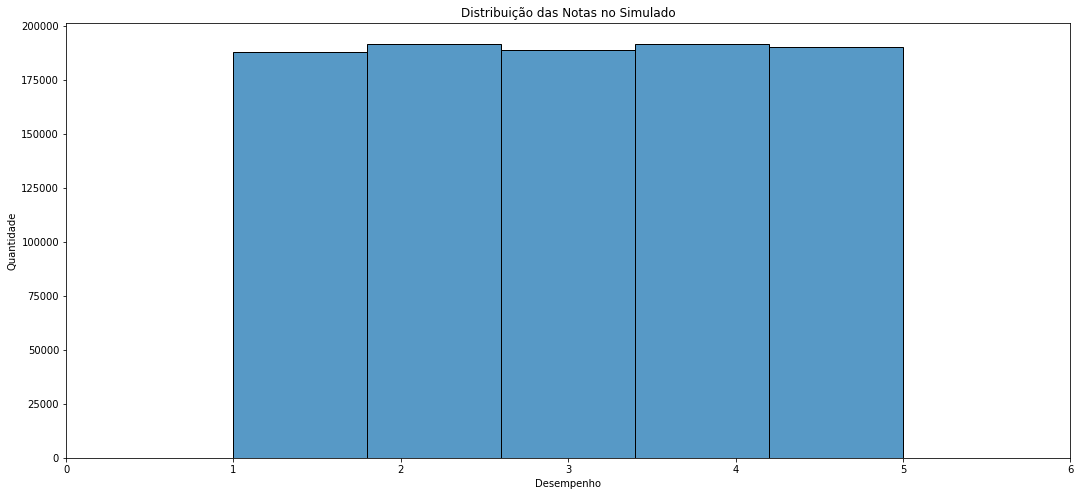

In [13]:
# Distribuição das notas por turmas
plt.figure(figsize=(18, 8))
plt.title('Distribuição das Notas no Simulado')
plt.ylabel('Quantidade')
plt.xlabel('Desempenho')
plt.xlim(0, 6)
sns.histplot(x=data['DESEMPENHO_TURMA_PROVA'], data=data, bins=5);

* Podemos observar uma distribuição uniforme, sem tendência clara.
* Estatisticamente quer dizer que qualquer aluno pode tirar qualquer nota 🤷

E se dividirmos as notas por turno? 🔍

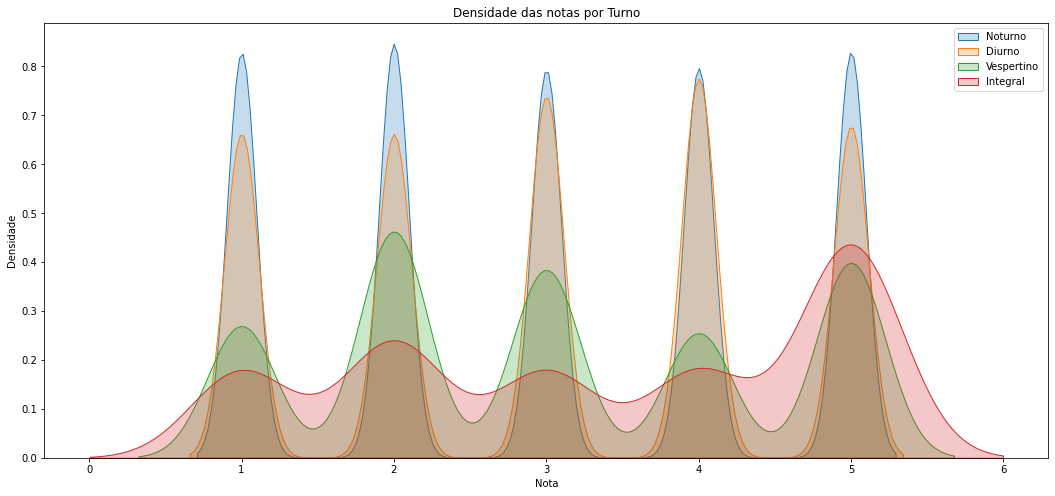

In [14]:
# Grade distribution by address
plt.figure(figsize=(18, 8))
sns.kdeplot(data.loc[data['TURNO'] == 'NOT', 'DESEMPENHO_TURMA_PROVA'],
            label='Noturno',
            shade=True)
sns.kdeplot(data.loc[data['TURNO'] == 'DIU', 'DESEMPENHO_TURMA_PROVA'],
            label='Diurno',
            shade=True)
sns.kdeplot(data.loc[data['TURNO'] == 'VES', 'DESEMPENHO_TURMA_PROVA'],
            label='Vespertino',
            shade=True)
sns.kdeplot(data.loc[data['TURNO'] == 'INT', 'DESEMPENHO_TURMA_PROVA'],
            label='Integral',
            shade=True)
plt.xlabel('Nota')
plt.ylabel('Densidade')
plt.legend(['Noturno', 'Diurno', 'Vespertino', 'Integral'])
plt.title('Densidade das notas por Turno');

💡 Parece que temos uma tendência!

O problema é que as turmas de período integral são em quantidade ínfima 🤡

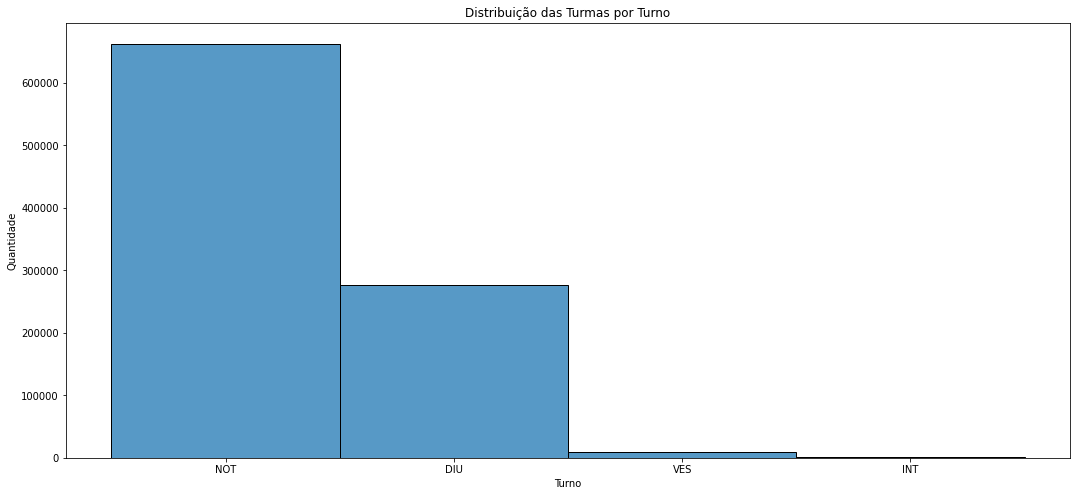

In [15]:
plt.figure(figsize=(18, 8))
plt.title('Distribuição das Turmas por Turno')
plt.ylabel('Quantidade')
plt.xlabel('Turno')
sns.histplot(data, x="TURNO");

## 🏛️ As unidades que tiveram pior desempenho 

Vamos mudar o foco para um espectro mais macro e observar o desempenho de cada unidade

* Cada ponto é uma das 78 unidades presente na base.
* O tamanho é associado a quantidade de disciplinas ofertadas por cada uma.

In [16]:
by_unidade = data.groupby(['COD_UNIDADE']).agg({'DESEMPENHO_TURMA_PROVA': 'mean',
                                              'QTD_ALUNOS': 'sum',
                                              'COD_MATRIZ': 'count',
                                              'TURNO': lambda x: pd.Series.mode(x)[0]})\
#.sort_values(by='DESEMPENHO_TURMA_PROVA', ascending=False)

by_unidade

,DESEMPENHO_TURMA_PROVA,QTD_ALUNOS,COD_MATRIZ,TURNO
COD_UNIDADE,,,,
CIL,3.061282,1455550,32440,NOT
CIP,3.026301,491934,10722,NOT
CPL,2.994065,1980476,43134,NOT
FA2,2.091892,14110,370,DIU
FA3,3.171884,1270058,27600,NOT
...,...,...,...,...
USE,2.500000,8400,224,NOT
UT2,3.048922,584186,12060,NOT
UTP,2.827599,502294,10870,NOT


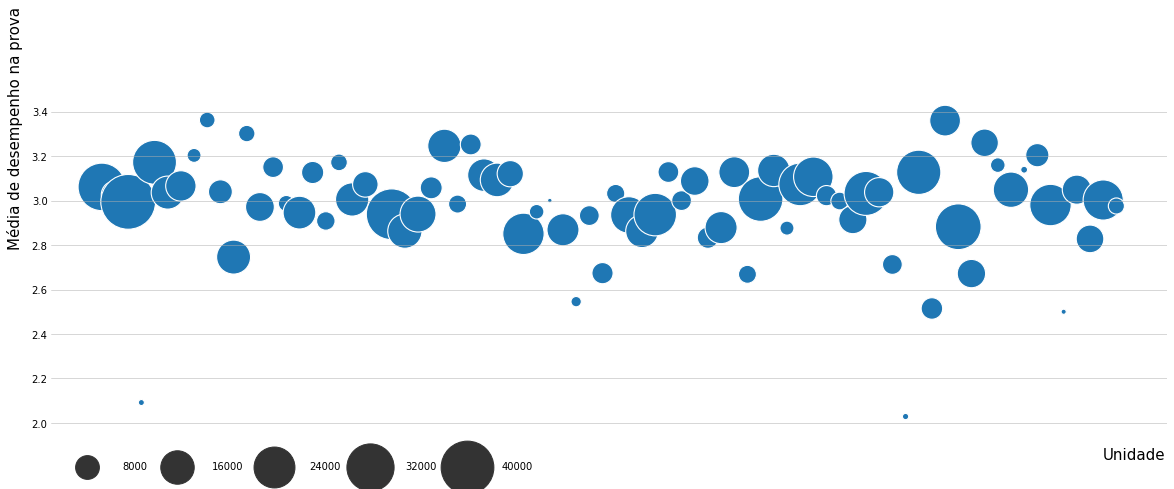

In [17]:
plt.figure(figsize=(20, 6))
ax = sns.scatterplot(x="COD_UNIDADE",
                     y="DESEMPENHO_TURMA_PROVA",
                     data=by_unidade,
                     size="COD_MATRIZ",
                     sizes=(20, 3000),
                     palette=sns.color_palette("pastel"))
sns.despine(top=True, bottom=True, left=True, right=True)
ax.set_xlabel("Unidade", fontsize=15)
ax.set_ylabel("Média de desempenho na prova", fontsize=15)
ax.xaxis.set_label_coords(0.97, -0.05)
ax.yaxis.set_label_coords(-0.025, 0.93)
ax.grid(visible=True, axis='y', linewidth=0.5)
ax.tick_params(axis=u'both', which=u'both', length=0, labelbottom=False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          labels,
          bbox_to_anchor=(0.01, -.17, 1, .102),
          loc='lower left',
          borderpad=1,
          frameon=False,
          handletextpad=2.5,
          columnspacing=2,
          ncol=9);

<font size="5">🧐 Conclusões</font> 

1. Não há correlação direta;
2. A maioria aparece dentro da média e dentro do desvio padrão;
4. Algumas unidades menores apresentam pior desempenho;

## 📚 Por Cursos

* Uma análise aglutinada pelos cursos, independente da disciplina.
* O tamanho referindo a quantidade de turmas por curso.
* Cada cor é um semestre, observando se há alguma tendência associada.

In [18]:
by_curso = data.groupby(['DESC_CURSO']).agg({'DESEMPENHO_TURMA_PROVA': 'mean',
                                              'QTD_ALUNOS': 'mean',
                                              'COD_MATRIZ': 'count',
                                              'SEMESTRE_ATUAL': lambda x: np.mean(x).astype(int),
                                              'TURNO': lambda x: pd.Series.mode(x)[0]})\
.sort_values(by='COD_MATRIZ', ascending=False).reset_index()

by_curso

,DESC_CURSO,DESEMPENHO_TURMA_PROVA,QTD_ALUNOS,COD_MATRIZ,SEMESTRE_ATUAL,TURNO
0,Administração,2.986443,43.443755,64468,3,NOT
1,Engenharia de Produção,2.912069,42.954125,61776,4,NOT
2,Enfermagem,2.877218,44.802681,58494,4,NOT
3,Direito,2.899605,45.771748,58190,4,NOT
4,Engenharia Mecânica,3.044097,45.553878,54698,3,NOT
...,...,...,...,...,...,...
84,Música - Licenciatura,3.500000,31.000000,216,1,NOT
85,Tecnologia em Design Grafico,2.500000,34.000000,112,1,DIU
86,Música,2.000000,60.000000,86,5,NOT
87,Tecnologia em Polímeros,1.000000,26.000000,84,1,NOT


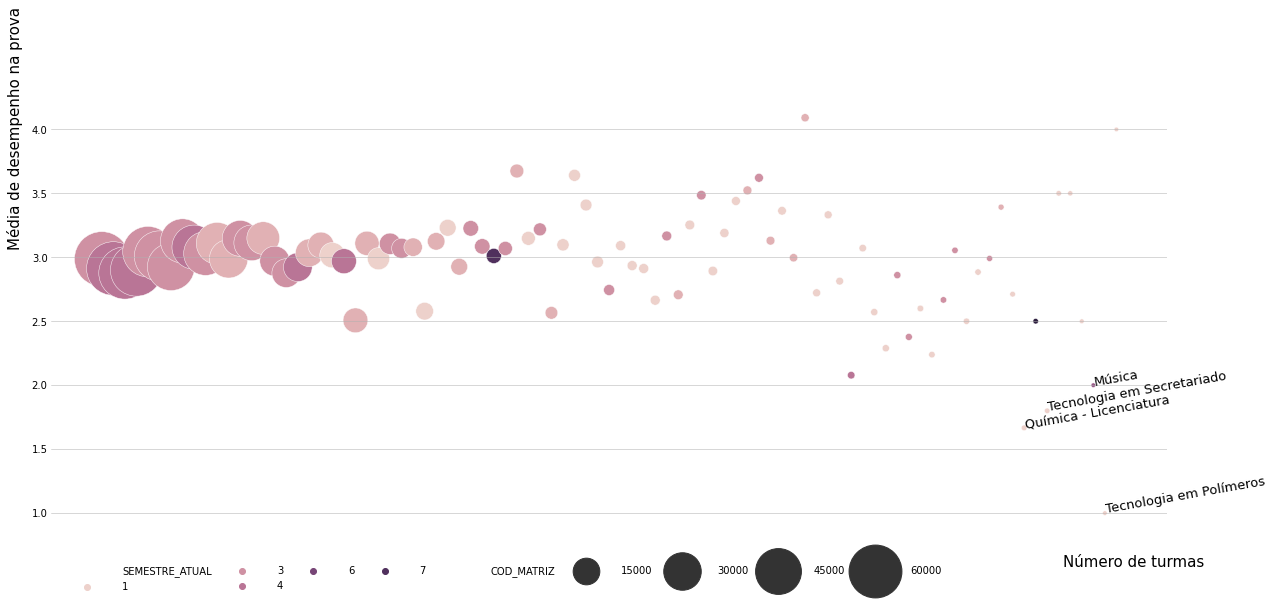

In [19]:
plt.figure(figsize=(20, 8))
ax = sns.scatterplot(x="DESC_CURSO",
                     y="DESEMPENHO_TURMA_PROVA",
                     data=by_curso,
                     size="COD_MATRIZ",
                     sizes=(20, 3000),
                     hue='SEMESTRE_ATUAL')
#palette=sns.color_palette("pastel"))
sns.despine(top=True, bottom=True, left=True, right=True)
ax.set_xlabel("Número de turmas", fontsize=15)
ax.set_ylabel("Média de desempenho na prova", fontsize=15)
ax.xaxis.set_label_coords(0.97, -0.05)
ax.yaxis.set_label_coords(-0.025, 0.93)
ax.grid(visible=True, axis='y', linewidth=0.5)
ax.tick_params(axis=u'both', which=u'both', length=0, labelbottom=False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          labels,
          bbox_to_anchor=(0.01, -.17, 1, .102),
          loc='lower left',
          borderpad=1,
          frameon=False,
          handletextpad=2.5,
          columnspacing=2,
          ncol=9)

for idx, row in by_curso.iterrows():
    if row["DESEMPENHO_TURMA_PROVA"] <= 2:
        ax.text(idx,
                row["DESEMPENHO_TURMA_PROVA"],
                row["DESC_CURSO"],
                rotation=10,
                fontsize=13);

<font size="5">🤓 Conclusões</font>
1. Maior o curso = mais consistente a média (explicável estatisticamente).
2. Correlação que menor o curso, menor a nota (não é causalidade!).
3. Semestre atual não apresenta nenhum efeito.

* Cursos menores estão menos sujeitos ao Teorema Central do Limite.

* Menores cursos estão mais aptos a um salto de qualidade.

In [20]:
priority = by_curso.loc[(by_curso['COD_MATRIZ'] <=
                (by_curso['COD_MATRIZ'].quantile(0.6)))
               & (by_curso['DESEMPENHO_TURMA_PROVA'] <=
                  (by_curso.describe()['DESEMPENHO_TURMA_PROVA'][1]))]

In [21]:
priority.shape

(26, 6)

In [22]:
1_000_000 / 26

38461.53846153846

* São 26 cursos que se enquadram no 60% com menos turmas e estão abaixo da média na prova
* Um investimento de 38000 por curso.
* Pode ser refinado!

## 🧑‍🎓 Análise Por Turmas

* Seguir a tendência da análise por curso.
* Observar o número de turmas abaixo da média

In [23]:
by_turma = data.groupby(['COD_MATRIZ']).agg({'DESEMPENHO_TURMA_PROVA': 'mean',
                                             'QTD_ALUNOS': 'mean',
                                             'SEMESTRE_FORMATURA': lambda x: pd.Series.mode(x)[0],
                                              'DESC_CURSO': lambda x: pd.Series.mode(x)[0]})\
.reset_index().sort_values(by='DESC_CURSO')

def turmas_by_course(dataframe):
    cursos = priority['DESC_CURSO'].tolist()
    df = pd.DataFrame()
    
    for index, row in dataframe.iterrows(): 
        if row['DESC_CURSO'] in cursos:
            df = df.append(row, ignore_index = True)
    return df

selected = turmas_by_course(by_turma).sort_values(by='QTD_ALUNOS')

selected.loc[
    (selected['DESEMPENHO_TURMA_PROVA'] <= 3) &
    (selected['SEMESTRE_FORMATURA'] > '2021_2')
            ]

,COD_MATRIZ,DESEMPENHO_TURMA_PROVA,QTD_ALUNOS,SEMESTRE_FORMATURA,DESC_CURSO
17,EGETS1702E,3.0,35.75,2022_1,Engenharia Eletrônica
20,EGETSD1702E,3.0,62.00,2022_1,Engenharia Eletrônica


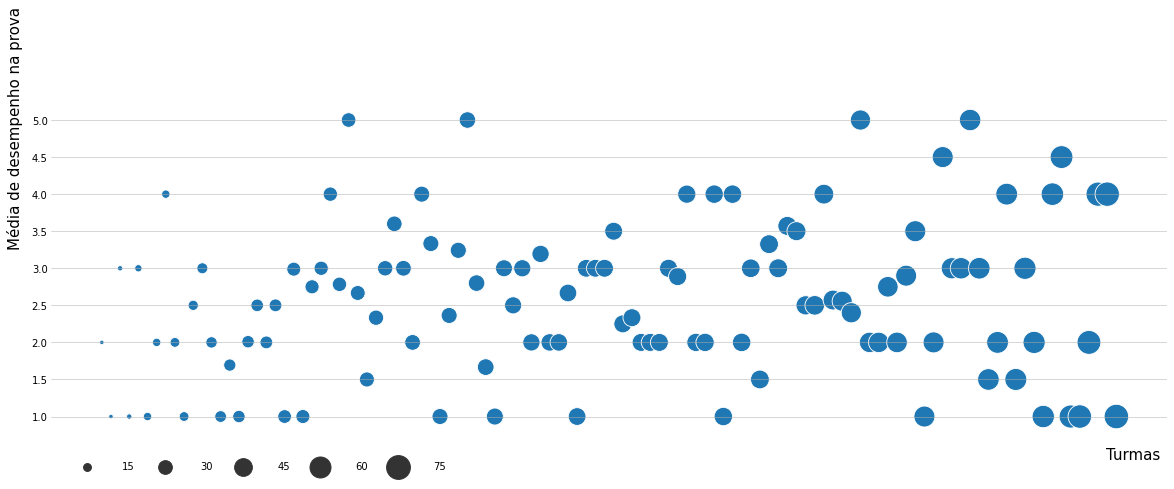

In [24]:
plt.figure(figsize=(20, 6))
ax = sns.scatterplot(x="COD_MATRIZ",
                     y="DESEMPENHO_TURMA_PROVA",
                     data=selected,
                     size="QTD_ALUNOS",
                     sizes=(20, 600),
                     palette=sns.color_palette("pastel"))
sns.despine(top=True, bottom=True, left=True, right=True)
ax.set_xlabel("Turmas", fontsize=15)
ax.set_ylabel("Média de desempenho na prova", fontsize=15)
ax.xaxis.set_label_coords(0.97, -0.05)
ax.yaxis.set_label_coords(-0.025, 0.93)
ax.grid(visible=True, axis='y', linewidth=0.5)
ax.tick_params(axis=u'both', which=u'both', length=0, labelbottom=False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          labels,
          bbox_to_anchor=(0.01, -.17, 1, .102),
          loc='lower left',
          borderpad=1,
          frameon=False,
          handletextpad=2.5,
          columnspacing=2,
          ncol=9);

<font size="5">🤔 Conclusões</font> 

1. Maior número de turmas na parte inferior da tabela.
2. Confirmando a tendência na análise dos cursos.
3. Possibilidade de listar turmas e direcionar o investimento.

In [25]:
# Número total de turmas que estão para se formar

by_turma.loc[
    (by_turma['DESEMPENHO_TURMA_PROVA'] <= 3) &
    (by_turma['SEMESTRE_FORMATURA'] > '2021_2')
            ].shape

(27, 5)

In [26]:
round(1_000_000 / 27) # Investimento total dividido por turmas

37037

# 📈 Considerações finais

* Observamos a tendência de baixo rendimento nos menores cursos
* Não é causalidade!
* Necessário mais dados.
* A presença de uma série históriaca é fundamental para o planejamento de cada semestre.
* Para o segundo semestre de 2021 é possível fazer um investimento em 27 turmas que ainda estão para se formar.
* Uma divisão de 37 mil para cada, o que é razoável.